In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw08.ipynb")

# Homework 8: Regression Redux
# 43 pts, Due Monday March 11 at 11:59pm 

# **Helpful Resources:**

- [Getting help on a Jupyter Notebook](https://problemsolvingwithpython.com/02-Jupyter-Notebooks/02.07-Getting-Help-in-a-Jupyter-Notebook/)

- [Python Examples](https://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/Python_101.ipynb): A reference for distinct Python commands




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import autograder_tools as at
%matplotlib inline

## Background
This week you will examine data from the Cancer Cell Line Encyclopedia -- discussed in this [paper](https://www.nature.com/articles/s41586-019-1186-3). You can examine data at this online portal [here](https://portals.broadinstitute.org/ccle).

The file `pten.csv` contains expression data in ~1000 cell lines for the PTEN gene. This gene suppresses tumors; mutations in the gene are associated with many types of cancer. A cell line is group of cells that are kept alive and replicate indefinitely in culture.

`pten.csv` contains four columns:`Cell Line` (the cell line type), `Copy Number` (This is technically the log-2 copy number ratio. A value of 0 corresponds to no variation in number of copies of the gene from reference; negative values are decreases in copy number, whereas positive values are increases), `mRNA Expression (Affy)` (mRNA expression measured by Affymetrix microarrays), and `mRNA Expression (RNA-Seq)` (mRNA expression measured by RNAseq).

See Wikipedia references here for background on [DNA microarrays](https://en.wikipedia.org/wiki/DNA_microarray) and [RNA-seq](https://en.wikipedia.org/wiki/RNA-Seq) as techniques 





### Question 1a (7 pts):
Read the csv file into a Pandas data frame and make three scatter plots as subplots in the same row. The figure should be 12 inches wide by 4 inches tall. This will allow for three 4"x4"  plots next to each other.

To solve this problem, **first create a figure of the desired size in a variable named `fig`**. Afterwords, you will have to add each of the plots to this figure. **To do this, add subplots to the figure in the following order**:

 - <u>On the first set of axes</u>, plot copy number ratio on horizontal axis and Affy mRNA data on vertical axis.
 - <u>On the second set of axes</u>, put copy number ratio on horizontal axis and RNA-Seq expresssion data on vertical axis.
 - <u>On the third set of axes</u>, put Affy mRNA data on horizontal axis and RNA-Seq mRNA on vertical axis <br>

**For scatter plots, use a marker size of 1 to make points legible.** Also, be sure to remove the spines on the top and right of each axes.

**Your graph should look something like this,** </br> 
<img src="1b.png" width="800" height="400">

### Answer 1a

<!-- BEGIN QUESTION -->



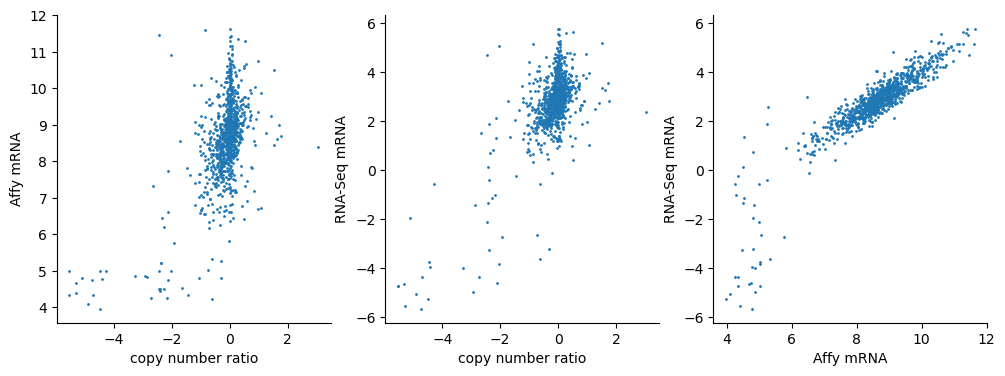

In [3]:
df = pd.read_csv('pten.csv')
fig=plt.figure()
fig.set_size_inches(12, 4)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(df['Copy Number'], df['mRNA Expression (Affy)'], s=1)
ax2.scatter(df['Copy Number'], df['mRNA Expression (RNAseq)'], s=1)
ax3.scatter(df['mRNA Expression (Affy)'], df['mRNA Expression (RNAseq)'], s=1)

ax1.set_xlabel('copy number ratio')
ax1.set_ylabel('Affy mRNA')
ax1.spines[['top','right']].set_visible(False)
ax2.set_xlabel('copy number ratio')
ax2.set_ylabel('RNA-Seq mRNA')
ax2.spines[['top','right']].set_visible(False)
ax3.set_xlabel('Affy mRNA')
ax3.set_ylabel('RNA-Seq mRNA')
ax3.spines[['top','right']].set_visible(False)

<!-- END QUESTION -->

### Question 1b (6 pts):
What is the Pearson correlation coefficient for each of these three relationships?

Save values to a dictionary called `corr_values`, which has keys `copy_affy`, `copy_rnaseq` and `affy_rnaseq`

**Note: you can use the `np.corrcoef` method to determine these values rather than converting to standard units and taking a slope.**

### Answer 1b


In [4]:
corr_values = {}

copy_affy_arr = np.corrcoef(df['Copy Number'], df['mRNA Expression (Affy)'])
copy_rnaseq_arr = np.corrcoef(df['Copy Number'], df['mRNA Expression (RNAseq)'])
affy_rnaseq_arr = np.corrcoef(df['mRNA Expression (Affy)'], df['mRNA Expression (RNAseq)'])

corr_values['copy_affy'] = copy_affy_arr[0,1]
corr_values['copy_rnaseq'] = copy_rnaseq_arr[0,1]
corr_values['affy_rnaseq'] = affy_rnaseq_arr[0,1]

# Printing the values in your dictionary
print('\n'.join([f"{key}: {val}" for key, val in corr_values.items()]))

copy_affy: 0.5819516653311987
copy_rnaseq: 0.6954196009651352
affy_rnaseq: 0.9000764746535074


In [5]:
grader.check("q1b")

q1b results: All test cases passed!

### Question 1c (6 pts):

Use the correlation coefficient between the Affymetrix and RNA-Seq data, calculated above, to compute the best-fit line for this relationship.


Remember the equation for how the slope of the best-fit line relates to the Pearson correlation coefficient:

**Slope = r * (sd(y)/sd(x))**
where **r** is correlation coefficient; sd(y) and sd(x) refer to the standard deviation of y and x data respectively.


Plot the raw affymetrix data and RNA-seq data as a scatter plot, with Affymetrix data on the horizontal axis. 
Add a plot of the best-fit line you calculated.</br>
Save the `slope` and `intercept` as your slope and intercept respectively, for testing purposes.

-6.454283849890285
1.0711396405743592


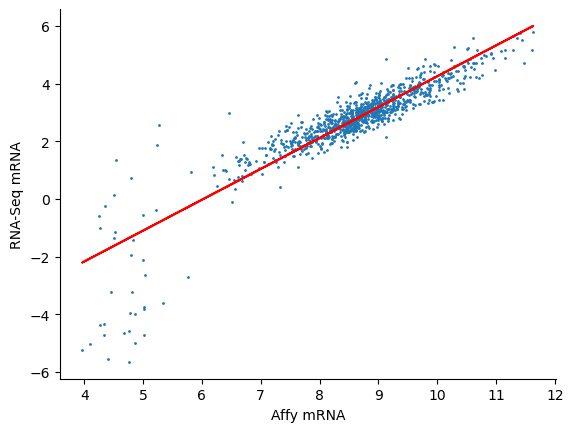

In [6]:
fig=plt.figure()
ax1c=fig.add_subplot(111)


slope = corr_values['affy_rnaseq'] * (np.std(df['mRNA Expression (RNAseq)'])/np.std(df['mRNA Expression (Affy)']))
intercept = np.mean(df['mRNA Expression (RNAseq)']) - slope*np.mean(df['mRNA Expression (Affy)'])

ax1c.scatter(df['mRNA Expression (Affy)'], df['mRNA Expression (RNAseq)'], s=1)
ax1c.set_xlabel('Affy mRNA')
ax1c.set_ylabel('RNA-Seq mRNA')
ax1c.spines[['top','right']].set_visible(False)
ax1c.plot(df['mRNA Expression (Affy)'], slope*df['mRNA Expression (Affy)']+intercept, 'r')

print(intercept) 
print(slope)


In [7]:
grader.check("q1c")

q1c results: All test cases passed!

### Question 1d (6 pts):

As we discussed in class, a general way to fit models to data is to use least-squares optimization. 

In the cell below, first create a dictionary called `opt_data`. Save the observed Affymetrix data to this dictionary, with key `affy`. Save the RNASeq data, with key `rnaseq`. 

Then define a function called `calc_RMSE_aff_rnaseq` which calculates and returns the root mean square error of any given linear model relating Affymetrix and RNA-Seq data. The function should take `line_parameters` as input, which is an array or list where the first index is slope and second index is y-intercept. 

The function should use data from the `opt_data` dictionary. This does not need to be taken in as a function argument but can be referred to in the body of the function.

### Answer 1d

In [8]:
opt_data = {}
opt_data['affy'] = df['mRNA Expression (Affy)']
opt_data['rnaseq'] = df['mRNA Expression (RNAseq)']

def calc_RMSE_aff_rnaseq(line_parameters):
    '''INPUT: array line_parameters, where line_parameters[0] is slope and line_parameters[1] is intercept
       OUTPUT: calculated_RMSE, a number.
       Note that the observed raw affymetrix data and RNAseq data should be referenced in this function
    '''
    predicted_rnaseq = line_parameters[0]*opt_data['affy'] + line_parameters[1]
    raw_error_values = opt_data['rnaseq'] - predicted_rnaseq
    rms_error = np.sqrt(np.mean(raw_error_values**2))
    return rms_error

#test with a flat line with intercept of 0, where RMSE should be sum of squares of y-data   
line_parameters = np.array([0,0])
RMSE_test = calc_RMSE_aff_rnaseq(line_parameters)
print('RMSE test is ' + str(RMSE_test))

RMSE test is 3.0687886592323035


In [9]:
grader.check("q1d")

q1d results: All test cases passed!

### Question 1e (8 pts): 
Python has excellent tools to perform automated optimization, which is central to machine learning.
Use the `scipy.optimize.minimize` function to determine which line parameters obtain a minimum value of RMSE.

Note that this [minimize function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) requires at least two inputs: The Objective function to be minimized, which will be your `calc_RMSE_aff_rnaseq` function as well as an input array, which is an initial guess at the inputs to the objective function.
Save your calculated slope and intercept to the variables `calculated_slope` and `calculated_intercept`.

Remake the third scatter plot from question 1b, but this time plot a line of the predicted mRNA-seq values given the observed Affy mRNA data.

**Your graph should look something like this,** </br> 
<img src="1e.png" width="800" height="400">

### Answer 1e

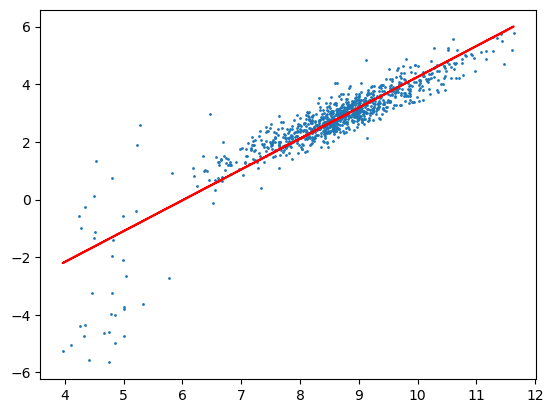

In [10]:
import scipy.optimize as opt
slope = corr_values['affy_rnaseq'] * (np.std(df['mRNA Expression (RNAseq)'])/np.std(df['mRNA Expression (Affy)']))
intercept = np.mean(df['mRNA Expression (RNAseq)']) - slope*np.mean(df['mRNA Expression (Affy)'])

predicted = opt.minimize(calc_RMSE_aff_rnaseq, [slope, intercept])
calculated_slope, calculated_intercept = predicted['x']

fig=plt.figure()
ax1e=fig.add_subplot(111)

ax1e.scatter(df['mRNA Expression (Affy)'], df['mRNA Expression (RNAseq)'], s=1)
ax1e.plot(df['mRNA Expression (Affy)'], calculated_slope*df['mRNA Expression (Affy)']+calculated_intercept, 'r')

In [11]:
grader.check("q1e")

q1e results: All test cases passed!

### Question 1f (5 pts): 

The oldest and most commonly used cell line in biology is the HeLa cell line, named after Henrietta Lacks, whose cervical cancer cells were taken in 1951 without her consent. The [Immortal Life of Henrietta Lacks](https://en.wikipedia.org/wiki/The_Immortal_Life_of_Henrietta_Lacks) was a highly regarded 2011 book about this story. There is also information at this [Johns Hopkins University site](https://www.hopkinsmedicine.org/henriettalacks/). 

The HeLa cell line is missing from our dataset. If we know that the HeLa Affymetrix mRNA Expression  value is 8.2, what is the predicted RNAseq value for this cell line using regression parameters calculated above? Remake scatter plot of the original data, adding a yellowmarker for the predicted HeLA value. </br> 
Please assign the predicted RNAseq values to `predicted_rnaseqvl` for grading purposes. </br>

**Your graph should look something like this,** </br> 
<img src="1f.png" width="800" height="400">

### Answer 1f

<bound method Axes.legend of <Axes: xlabel='Affy mRNA', ylabel='mRNA-seq'>>

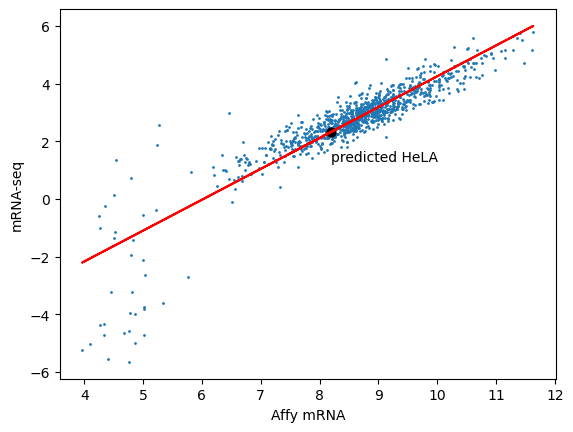

In [38]:
fig=plt.figure()
ax1f=fig.add_subplot(111)

ax1f.plot(df['mRNA Expression (Affy)'], calculated_slope*df['mRNA Expression (Affy)']+calculated_intercept, 'r')
ax1f.scatter(df['mRNA Expression (Affy)'], df['mRNA Expression (RNAseq)'], s=1)
predicted_rnaseqvl = calculated_slope*8.2 + calculated_intercept
ax1f.scatter(8.2, predicted_rnaseqvl, 40, color = 'k')
ax1f.text(8.2, predicted_rnaseqvl -1, 'predicted HeLA', color = 'k')

ax1f.set_xlabel('Affy mRNA')
ax1f.set_ylabel('mRNA-seq')
ax1f.legend

In [39]:
grader.check("q1f")

q1f results: All test cases passed!

### Question 1g (7 pts):
Use a bootstrap approach to estimate a 95% confidence interval for the HeLA predicted RNAseq value. You should resample the observed paired data `mRNA Expression (Affy)` and `mRNA Expression (RNAseq)` with replacement (200 times). Each loop should update `opt_data`, recalculate the regression, and generate a HeLa prediction value.
Save the 95% confidence interval of HeLA RNA-Seq values to an array `conf_interval`

*Hint:* Remember that the bootstrap should preserve specific x,y pairs but resample with replacement which pairs contribute to the regression.


### Answer 1g

In [46]:
num_bootstraps = 200
hela_vals_arr = np.zeros(num_bootstraps)
for run in range(num_bootstraps):
    indices = np.random.choice(np.arange(len(opt_data['affy'])), len(opt_data['affy']), replace=True)
    opt_data['affy'] = df['mRNA Expression (Affy)'][indices]
    opt_data['rnaseq'] = df['mRNA Expression (RNAseq)'][indices]
    
    slope = corr_values['affy_rnaseq'] * (np.std(opt_data['rnaseq'])/np.std(opt_data['affy']))
    intercept = np.mean(opt_data['rnaseq']) - slope*np.mean(opt_data['affy'])
    predicted = opt.minimize(calc_RMSE_aff_rnaseq, [slope, intercept])
    calculated_slope, calculated_intercept = predicted['x']
    hela_val = calculated_slope*8.2 + calculated_intercept
    hela_vals_arr[run] = hela_val
    
conf_interval = np.percentile(hela_vals_arr, [2.5, 97.5])

# Printing the confidence interval
print("95% conf_interval is " + str(conf_interval[0])+ ' to '+str(conf_interval[1]))

95% conf_interval is 2.2790528475929324 to 2.401285709673722


In [47]:
grader.check("q1g")

q1g results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)